<a href="https://colab.research.google.com/github/yeeun0813/baewha/blob/main/ocr%EA%B3%BC%EC%A0%9C_2025200112.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from google.colab import files

uploaded = files.upload()  # 실행하면 파일 업로드창이 열림


Saving kimyeeun_.jpg to kimyeeun_.jpg


Config of the encoder: <class 'transformers.models.vit.modeling_vit.ViTModel'> is overwritten by shared encoder config: ViTConfig {
  "attention_probs_dropout_prob": 0.0,
  "encoder_stride": 16,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 768,
  "image_size": 384,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "model_type": "vit",
  "num_attention_heads": 12,
  "num_channels": 3,
  "num_hidden_layers": 12,
  "patch_size": 16,
  "pooler_act": "tanh",
  "pooler_output_size": 768,
  "qkv_bias": false,
  "torch_dtype": "float32",
  "transformers_version": "4.50.3"
}

Config of the decoder: <class 'transformers.models.trocr.modeling_trocr.TrOCRForCausalLM'> is overwritten by shared decoder config: TrOCRConfig {
  "activation_dropout": 0.0,
  "activation_function": "gelu",
  "add_cross_attention": true,
  "attention_dropout": 0.0,
  "bos_token_id": 0,
  "classifier_dropout": 0.0,
  "cross_attention_hidden_size": 768,
  "d_mod

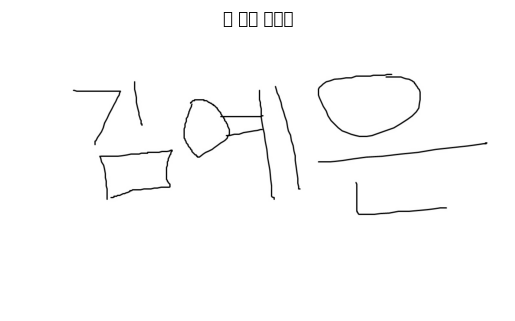

📝 인식된 글자: 75041.


In [7]:
# 설치
!pip install transformers
!pip install pillow

# 필요한 라이브러리 불러오기
from PIL import Image
import matplotlib.pyplot as plt
from transformers import TrOCRProcessor, VisionEncoderDecoderModel

# 모델 불러오기
processor = TrOCRProcessor.from_pretrained("microsoft/trocr-base-handwritten")
model = VisionEncoderDecoderModel.from_pretrained("microsoft/trocr-base-handwritten")

# 이미지 불러오기 (파일 이름 바꾸지 않았으면 그대로 둬도 돼!)
image = Image.open("kimyeeun_.jpg").convert("RGB")

# 이미지 보여주기
plt.imshow(image)
plt.axis("off")
plt.title("내 이름 이미지")
plt.show()

# OCR 실행 (글자 인식)
inputs = processor(images=image, return_tensors="pt")
generated_ids = model.generate(inputs.pixel_values)
text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]

# 결과 출력
print("📝 인식된 글자:", text)
